In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import curve_fit
rng = np.random.default_rng()
will_dark_blue = "#192A7C"
will_light_blue = "#1E84BA"


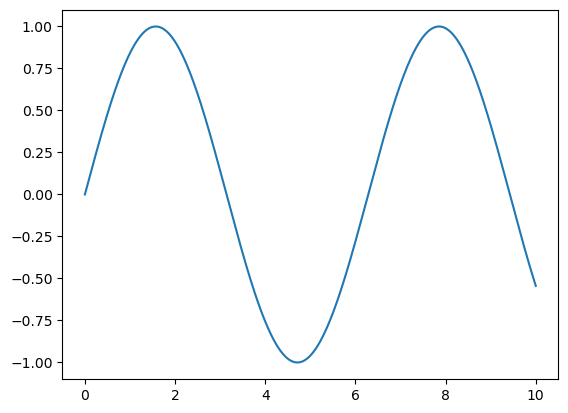

In [2]:
timerange = np.linspace(0,10,1000)
basic_oscillation = np.sin(timerange)
plt.plot(timerange, basic_oscillation)
plt.show()
plt.close()

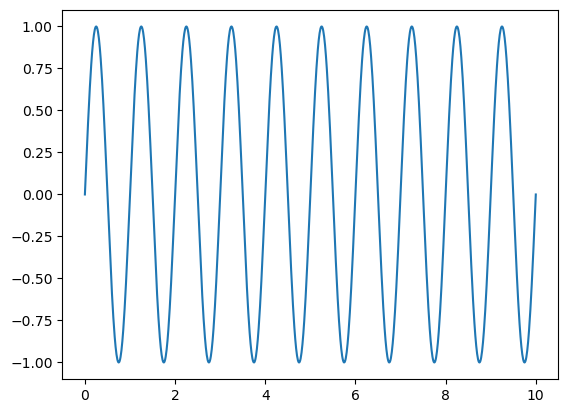

In [3]:
first_freq = 1
first_wave = np.sin(2*np.pi*first_freq*timerange)
plt.plot(timerange, first_wave)
plt.show()
plt.close()

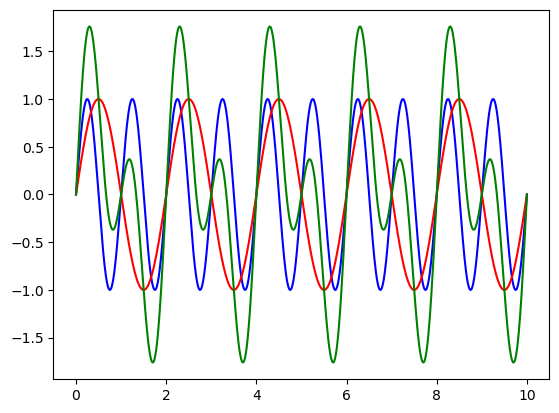

In [4]:
second_freq = 0.5
second_wave = np.sin(2*np.pi*second_freq*timerange)
plt.plot(timerange, first_wave, color = "blue")
plt.plot(timerange, second_wave, color = "red")
plt.plot(timerange, first_wave + second_wave, color = "green")
plt.show()
plt.close()

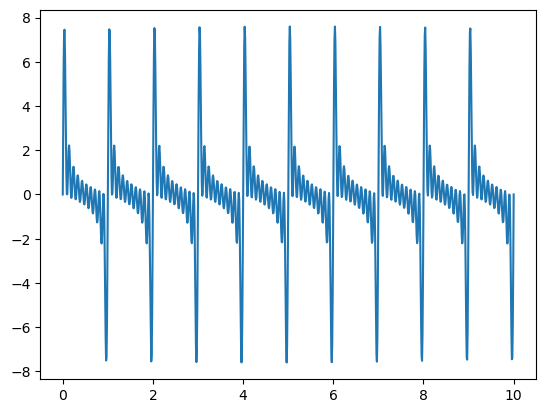

In [5]:
freq_list = np.linspace(1,10,10)
sum_wave = np.zeros(1000)
for f in freq_list:
    sum_wave += np.sin(2*np.pi*f*timerange)
plt.plot(timerange, sum_wave)
plt.show()
plt.close()

[5.30873318 0.02437948 3.58621219 2.98086704 6.11013163 2.86845878
 5.01347458 0.53461184 5.00603509 3.49187465]
5.308733184038646
0.024379478701078004
3.58621219157418
2.9808670408553266
6.11013163468159
2.8684587820319147
5.0134745784880455
0.5346118427559404
5.006035085795563
3.49187465352813


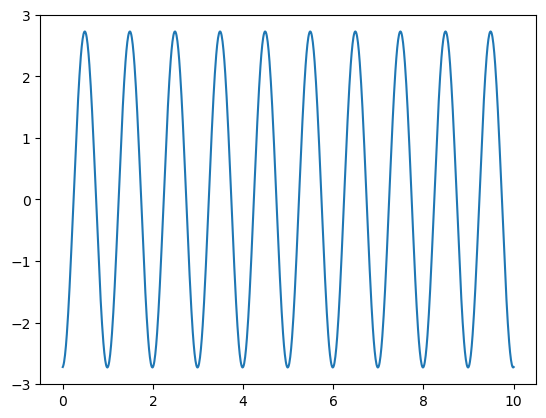

In [6]:
phase_list = 2*np.pi*rng.random(10)
print(phase_list)
phase_wave = np.zeros(1000)
for p in phase_list:
    print(p)
    phase_wave += np.sin(2*np.pi*first_freq*timerange + p)
plt.plot(timerange, phase_wave)
plt.show()
plt.close()

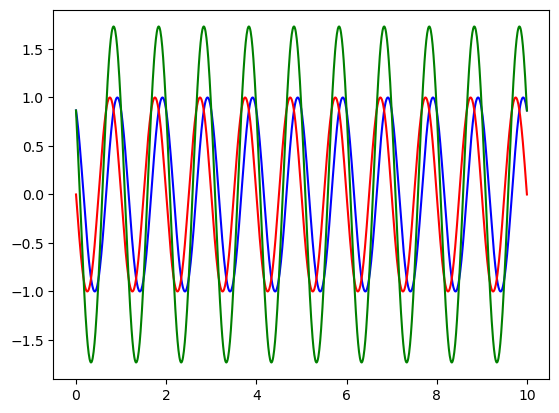

In [7]:
p1 = 2*np.pi/3
p2 = 2*np.pi/2
p1_wave = np.sin(2*np.pi*1*timerange + p1)
p2_wave = np.sin(2*np.pi*1*timerange + p2)
p1p2_wave = p1_wave + p2_wave
plt.plot(timerange, p1_wave, color = "blue")
plt.plot(timerange, p2_wave, color = "red")
plt.plot(timerange, p1p2_wave, color = "green")
plt.show()
plt.close()

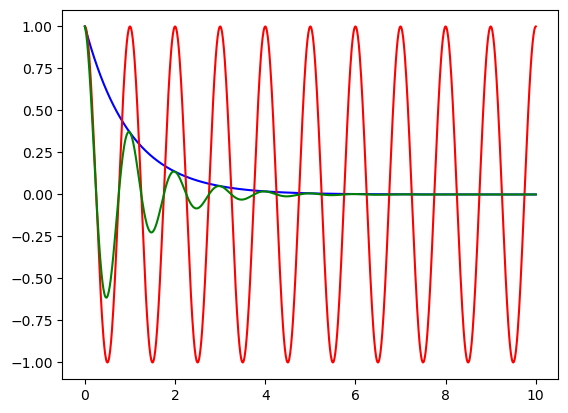

In [8]:
decay_func = np.exp(-timerange)
wave_func = np.cos(2*np.pi*first_freq*timerange)
decaying_wave = decay_func * wave_func
plt.plot(timerange, decay_func, color = "blue")
plt.plot(timerange, wave_func, color = "red")
plt.plot(timerange, decaying_wave, color = "green")
plt.show()
plt.close()

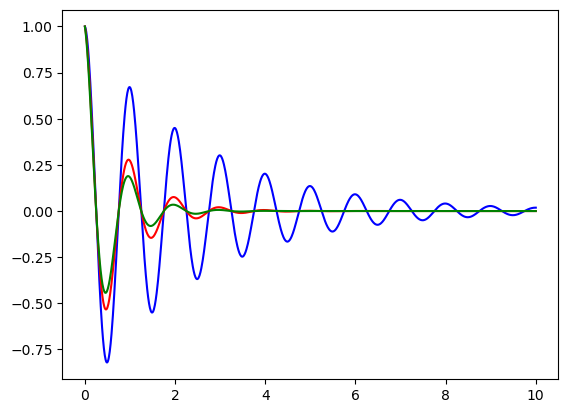

In [9]:
decay_rate_1 = 0.4
decay_func_1 = np.exp(-decay_rate_1*timerange)
decay_rate_2 = 1.3
decay_func_2 = np.exp(-decay_rate_2*timerange)
decaying_1_wave = decay_func_1 * wave_func
decaying_2_wave = decay_func_2 * wave_func
combined_decay_wave = decay_func_1 * decay_func_2 * wave_func
plt.plot(timerange, decaying_1_wave, color = "blue")
plt.plot(timerange, decaying_2_wave, color = "red")
plt.plot(timerange, combined_decay_wave, color = "green")
plt.show()
plt.close()

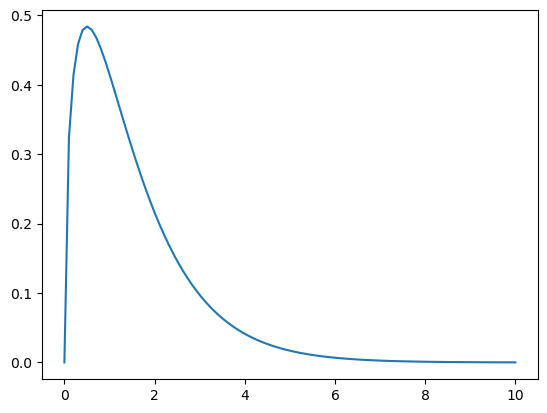

In [10]:
xrange = np.linspace(0, 10, 100)
shape = 1.5
dist = gamma.pdf(xrange, shape)
plt.plot(xrange, dist)
plt.show()
plt.close()

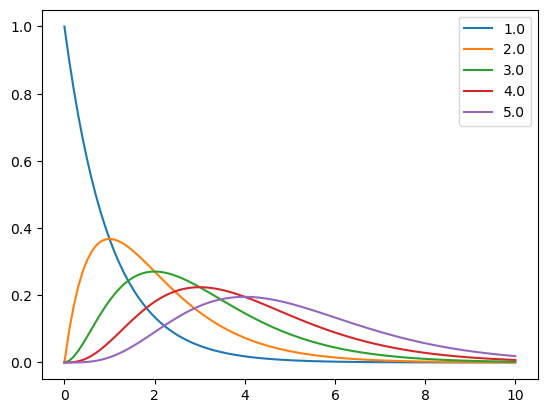

In [11]:
shaperange = np.linspace(1,5,5)
for s in shaperange:
    plt.plot(xrange, gamma.pdf(xrange, s), label = f"{s}")
plt.legend()
plt.show()
plt.close()

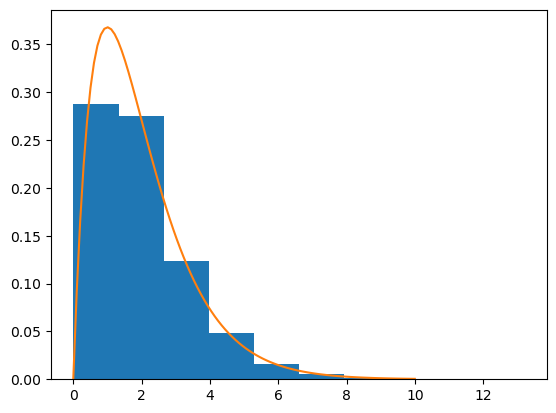

In [12]:
shape = 2
scale = 1
samples = rng.gamma(shape, scale, size = 10000)
plt.hist(samples, density = True)
plt.plot(xrange, gamma.pdf(xrange, shape))
plt.show()
plt.close()

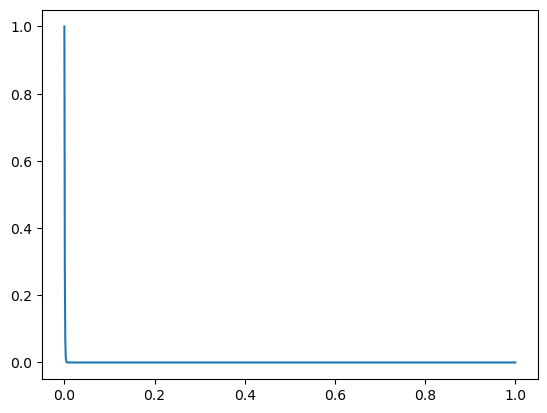

In [13]:
r_shape = 4
r_scale = 2.1
n_rates = 10
n_times = 1000

t = np.linspace(0, 1, n_times)
freq = 1

drawn_rates = rng.gamma(shape, scale, size = n_rates)

wave = np.cos(2*np.pi*freq*t)

for rate in drawn_rates:
    wave *= np.exp(-rate * t) * wave   
    
plt.plot(t, wave)
plt.show()
plt.close()

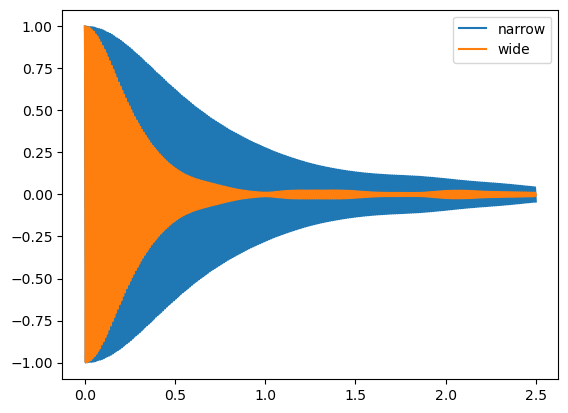

In [14]:
r_shape = 2.17
r_scale = 0.24
n_freqs = 5000
n_times = 10000
t = np.linspace(0, 2.5, n_times)

drawn_freqs = rng.gamma(r_shape, r_scale, size = n_freqs)

wave = np.zeros(n_times)

for f in drawn_freqs:
    wave += np.cos(2*np.pi*(f+100)*t)

wave = wave/np.max(wave)

second_wave = np.zeros(n_times)

r_shape_2 = 3.35
r_scale_2 = 0.45

drawn_freqs_2 = rng.gamma(r_shape_2, r_scale_2, size = n_freqs)

for f in drawn_freqs_2:
    second_wave += np.cos(2*np.pi*(f+100)*t)
    
second_wave = second_wave/np.max(second_wave)

plt.plot(t, wave, label = "narrow")
plt.plot(t, second_wave, label = "wide")
plt.legend()
plt.show()
plt.close()

In [15]:
def decaying_cos(time, decay_rate, cos_freq):
    return np.exp(-decay_rate*time)*np.cos(2*np.pi*cos_freq*time)

popt_1, pcov_1 = curve_fit(decaying_cos, t, wave)
popt_2, pcov_2 = curve_fit(decaying_cos, t, second_wave)

print(popt_1, pcov_1)
print(popt_2, pcov_2)

[   1.3256615  -100.36003601] [[ 4.00072324e-05 -2.16173141e-10]
 [-2.16173141e-10  1.01327980e-06]]
[   3.35257551 -101.20810587] [[ 1.99832906e-04 -7.32156146e-11]
 [-7.32156146e-11  5.06182656e-06]]


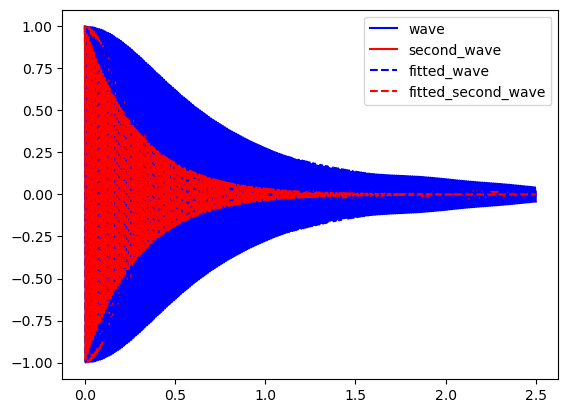

In [16]:
fitted_wave_data = decaying_cos(t, popt_1[0],popt_1[1])
fitted_second_wave_data = decaying_cos(t, popt_2[0], popt_2[1])

plt.plot(t, wave, label = "wave", color = "blue")
plt.plot(t, second_wave, label = "second_wave", color = "red")
plt.plot(t, fitted_wave_data, label = "fitted_wave", color = "blue", linestyle = "dashed")
plt.plot(t, fitted_second_wave_data, label = "fitted_second_wave", color = "red", linestyle = "dashed")
plt.legend()
plt.show()
plt.close()

In [17]:
def spin_wave_creator(gamma_shape, gamma_scale, max_time = 1.5, n_times = 10000, n_freqs = 10000, base_freq = 100):
    t = np.linspace(0, max_time, n_times)
    drawn_freqs = rng.gamma(gamma_shape, gamma_scale, size = n_freqs)

    wave = np.zeros(n_times)
    for f in drawn_freqs:
        wave += np.cos(2*np.pi*(f+base_freq)*t) # add a base frequency to stop overdamping

    wave = wave/np.max(wave)
    
    return t, wave

def spin_wave_fitter(time, wave_to_fit):
    fit_params, fit_errors = curve_fit(decaying_cos, time, wave_to_fit)
    return fit_params, fit_errors

def fit_plotter(time, wave, fit_params):
    fig, ax = plt.subplots()
    exp_decay = np.exp(-fit_params[0] * time)
    plt.plot(time, wave,
            color = will_dark_blue,
            alpha = 0.25)
    ax.plot(time, exp_decay,
            linestyle = "dashed", 
            color = "black", 
            label = f"Decay Envelope ($\lambda = {np.around(fit_params[0], 1)}$)")
    plt.legend()
    plt.show()
    
def species_all_fits_plotter(species_data, evolution_time = 1.5):
    name = species_data["species"]
    old_data = species_data["old"]
    LR_data = species_data["LR"]
    RL_data = species_data["RL"]
    
    old_time, old_wave = spin_wave_creator(*old_data, max_time = evolution_time)
    old_fit_params, old_fit_errors = spin_wave_fitter(old_time, old_wave)
    old_exp_decay = np.exp(-old_fit_params[0]*old_time)
    
    LR_time, LR_wave = spin_wave_creator(*LR_data, max_time = evolution_time)
    LR_fit_params, LR_fit_errors = spin_wave_fitter(LR_time, LR_wave)
    LR_exp_decay = np.exp(-LR_fit_params[0]*LR_time)
    
    RL_time, RL_wave = spin_wave_creator(*RL_data, max_time = evolution_time)
    RL_fit_params, RL_fit_errors = spin_wave_fitter(RL_time, RL_wave)
    RL_exp_decay = np.exp(-RL_fit_params[0]*RL_time)
    
    plt.rc("font", size = 18)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 16))
    
    ax1.plot(old_time, old_wave,
            color = will_dark_blue,
            alpha = 0.25)
    
    ax1.plot(old_time, old_exp_decay,
            linestyle = "dashed", 
            color = "black",
            linewidth = 4,
            label = f"Decay Envelope ($\lambda = {np.around(old_fit_params[0], 2)}$)")
    ax1.legend()
    ax1.set_title("Original QD")
    ax1.set_ylabel("Coherence (arb. units)")
    ax1.set_xlabel("Time (arb. units)")
    
    ax2.plot(LR_time, LR_wave,
            color = will_dark_blue,
            alpha = 0.25)
    
    ax2.plot(LR_time, LR_exp_decay,
            linestyle = "dashed", 
            color = "black",
            linewidth = 4,
            label = f"Decay Envelope ($\lambda = {np.around(LR_fit_params[0], 2)}$)")
    ax2.legend()
    ax2.set_title("Dot LR")
    ax2.set_ylabel("Coherence (arb. units)")
    ax2.set_xlabel("Time (arb. units)")
    
    ax3.plot(RL_time, RL_wave,
            color = will_dark_blue,
            alpha = 0.25)
    
    ax3.plot(RL_time, RL_exp_decay,
            linestyle = "dashed", 
            color = "black",
            linewidth = 4,
            label = f"Decay Envelope ($\lambda = {np.around(RL_fit_params[0], 2)}$)")
    ax3.legend()
    ax3.set_title("Dot RL")
    ax3.set_ylabel("Coherence (arb. units)")
    ax3.set_xlabel("Time (arb. units)")
    
    ax4.plot(old_time, old_exp_decay,
            color = will_dark_blue,
            linewidth = 2,
            label = f"Original QD ($\lambda = {np.around(old_fit_params[0], 2)}$)")
    
    ax4.plot(LR_time, LR_exp_decay,
            color = will_light_blue,
            linewidth = 2,
            label = f"Dot LR ($\lambda = {np.around(LR_fit_params[0], 2)}$)")
    
    ax4.plot(RL_time, RL_exp_decay,
            color = "green",
            linewidth = 2,
            label = f"Dot RL ($\lambda = {np.around(RL_fit_params[0], 2)}$)")
    ax4.legend()
    ax4.set_title("Decay Comparison")
    ax4.set_ylabel("Coherence (arb. units)")
    ax4.set_xlabel("Time (arb. units)")
    
    fig.suptitle(f"{name} Decay Modelling")
    
    plt.tight_layout()
    plt.show()
    plt.close()
    

# formatted to be expanded into the spin_wave_creator
# [shape, scale]
ga69_old_data = [3.35, 0.45] # NMR/PL
ga71_old_data = [3.83, 0.15] # NAR
as75_old_data = [4.2, 0.47] # NMR/PL
in115_old_data = [3.14, 0.19] # NAR

ga69_LR_data = [3.78, 0.20]
ga71_LR_data = [5.14, 0.13]
as75_LR_data = [5.27, 0.40]
in115_LR_data = [4.32, 0.15]

ga69_RL_data = [2.17, 0.24]
ga71_RL_data = [3.29, 0.15]
as75_RL_data = [3.67, 0.48]
in115_RL_data = [2.61, 0.18]

ga69_all_data = {
    "species": "Ga69",
    "old": ga69_old_data,
    "LR" : ga69_LR_data,
    "RL" : ga69_RL_data
}

ga71_all_data = {
    "species": "Ga71",
    "old": ga71_old_data,
    "LR" : ga71_LR_data,
    "RL" : ga71_RL_data
}

as75_all_data = {
    "species": "As75",
    "old": as75_old_data,
    "LR" : as75_LR_data,
    "RL" : as75_RL_data
}

in115_all_data = {
    "species": "In115",
    "old": in115_old_data,
    "LR" : in115_LR_data,
    "RL" : in115_RL_data
}

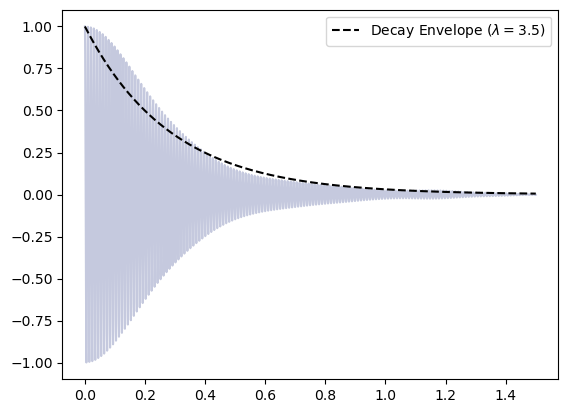

In [18]:
ga_time, ga_wave = spin_wave_creator(*ga69_old_data)
fit_params, fit_errors = spin_wave_fitter(ga_time, ga_wave)
fit_plotter(ga_time, ga_wave, fit_params)
plt.close()

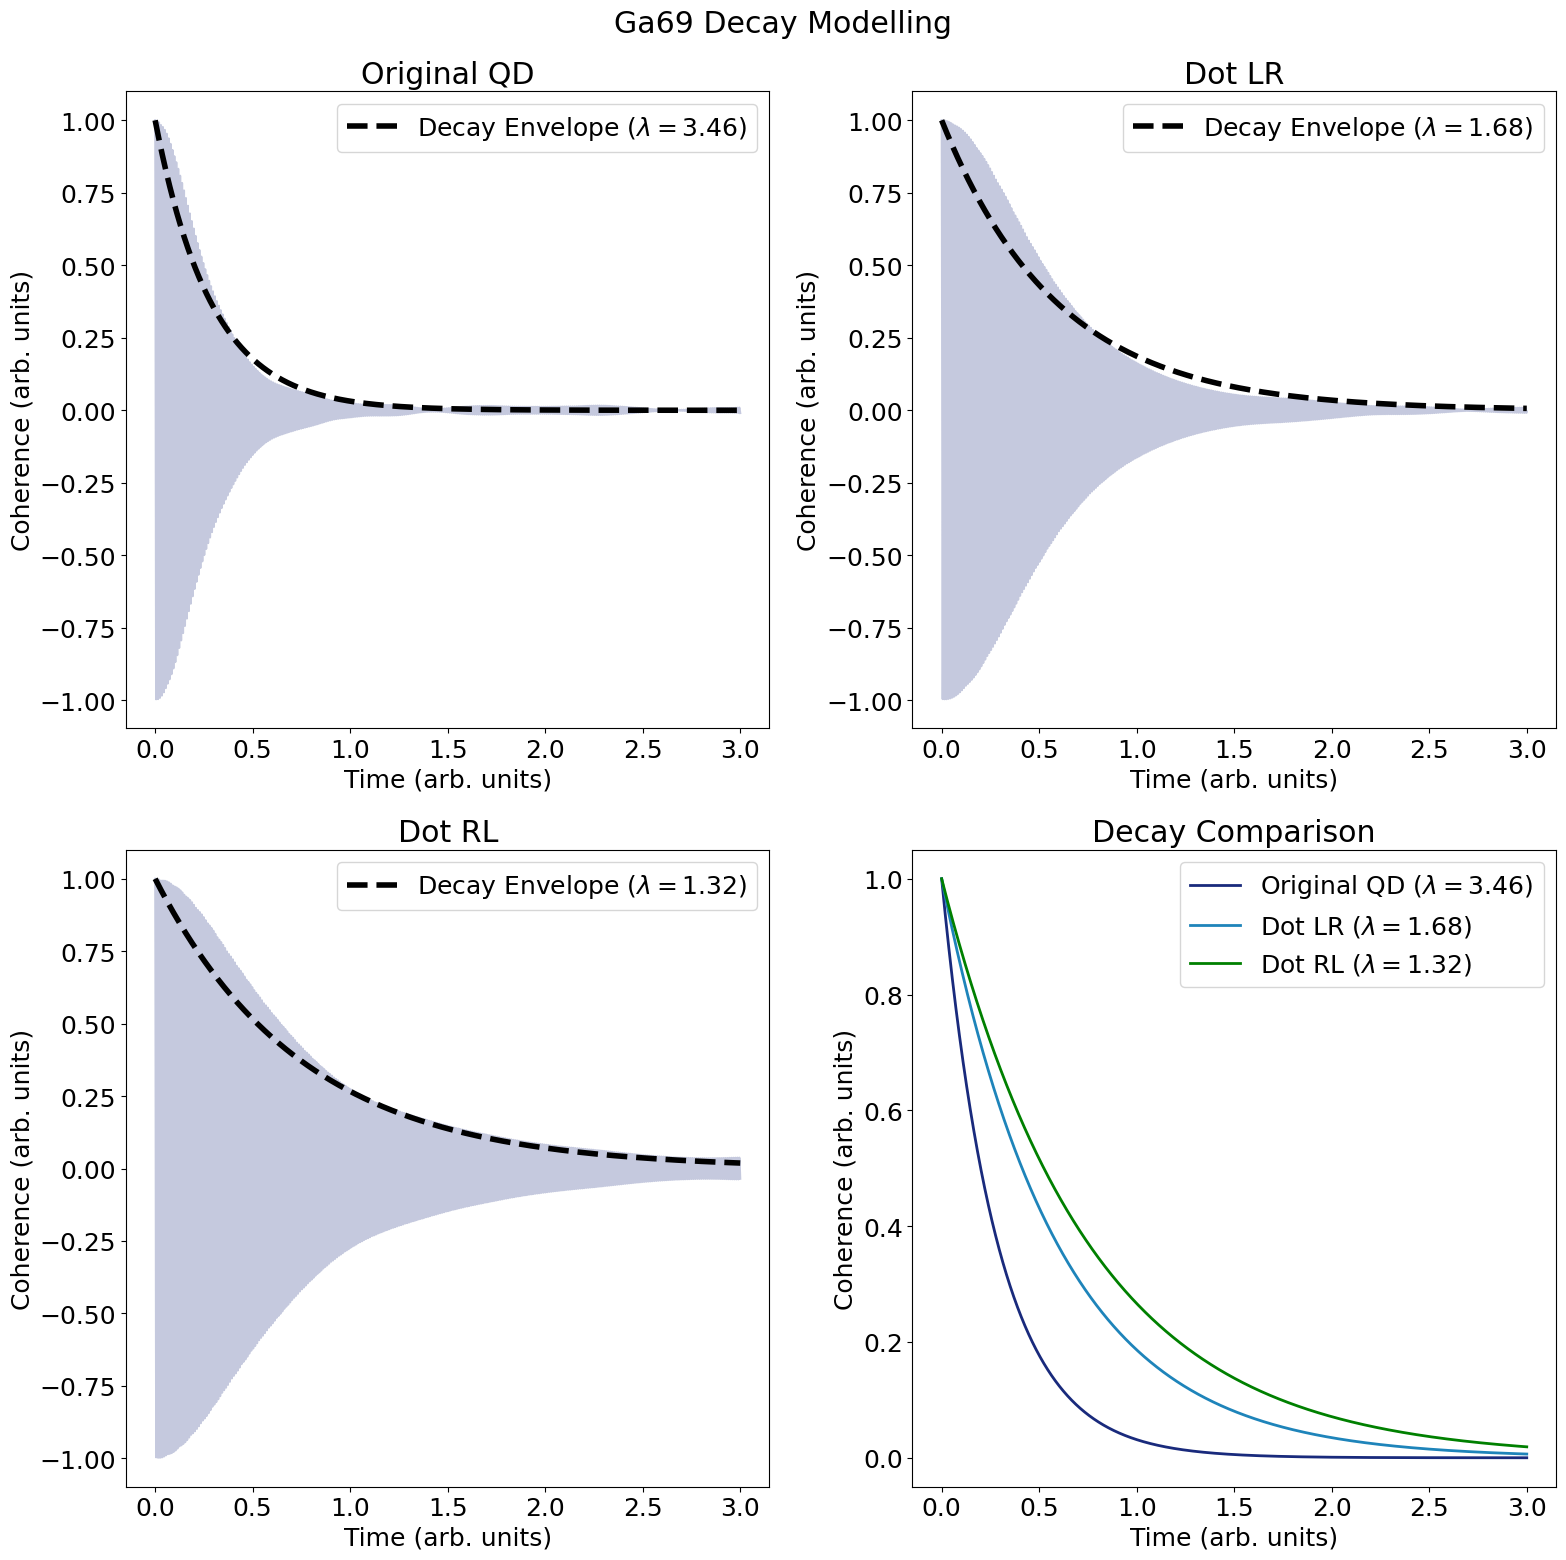

In [19]:
species_all_fits_plotter(ga69_all_data, 3)

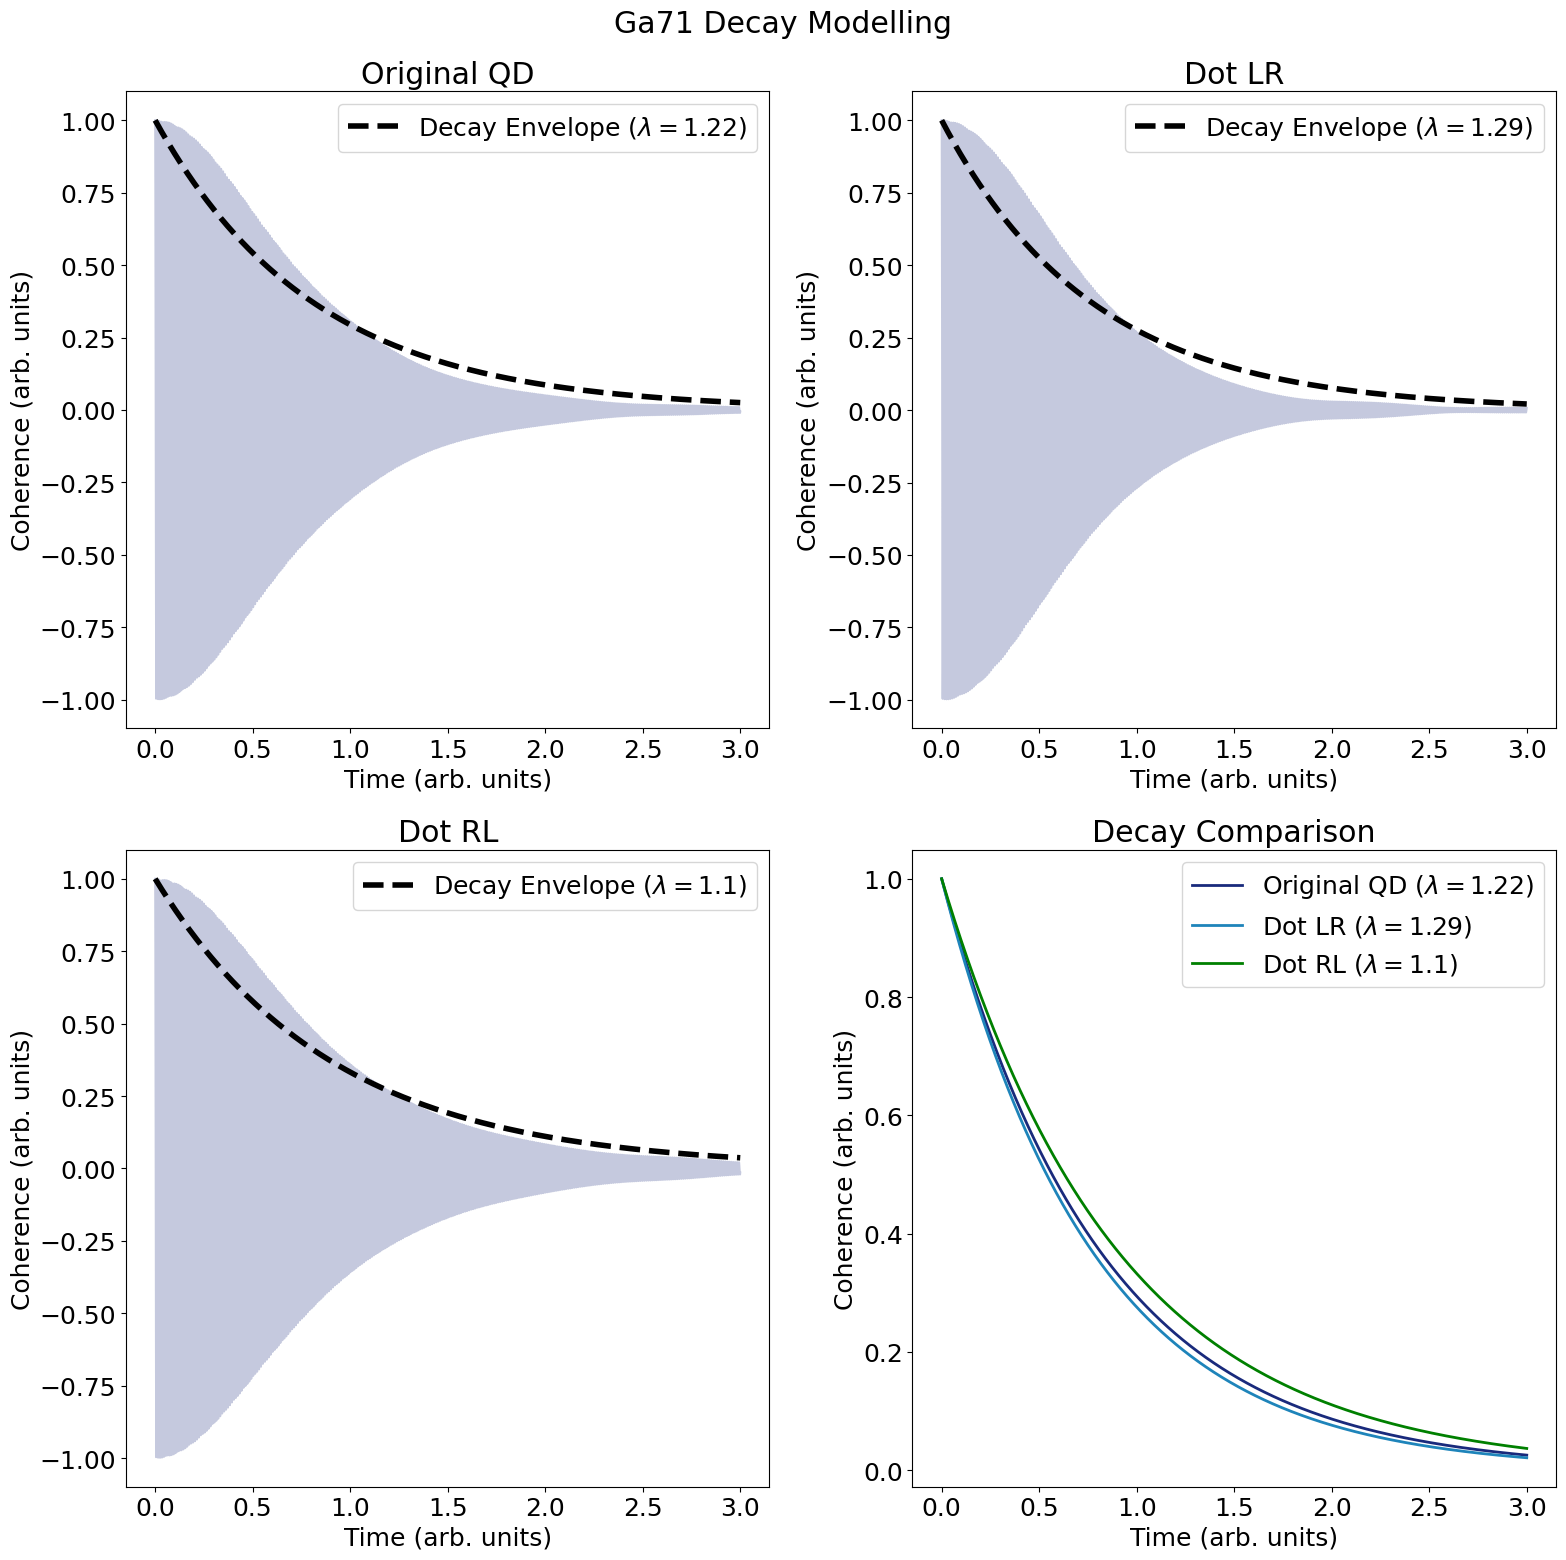

In [20]:
species_all_fits_plotter(ga71_all_data, 3)

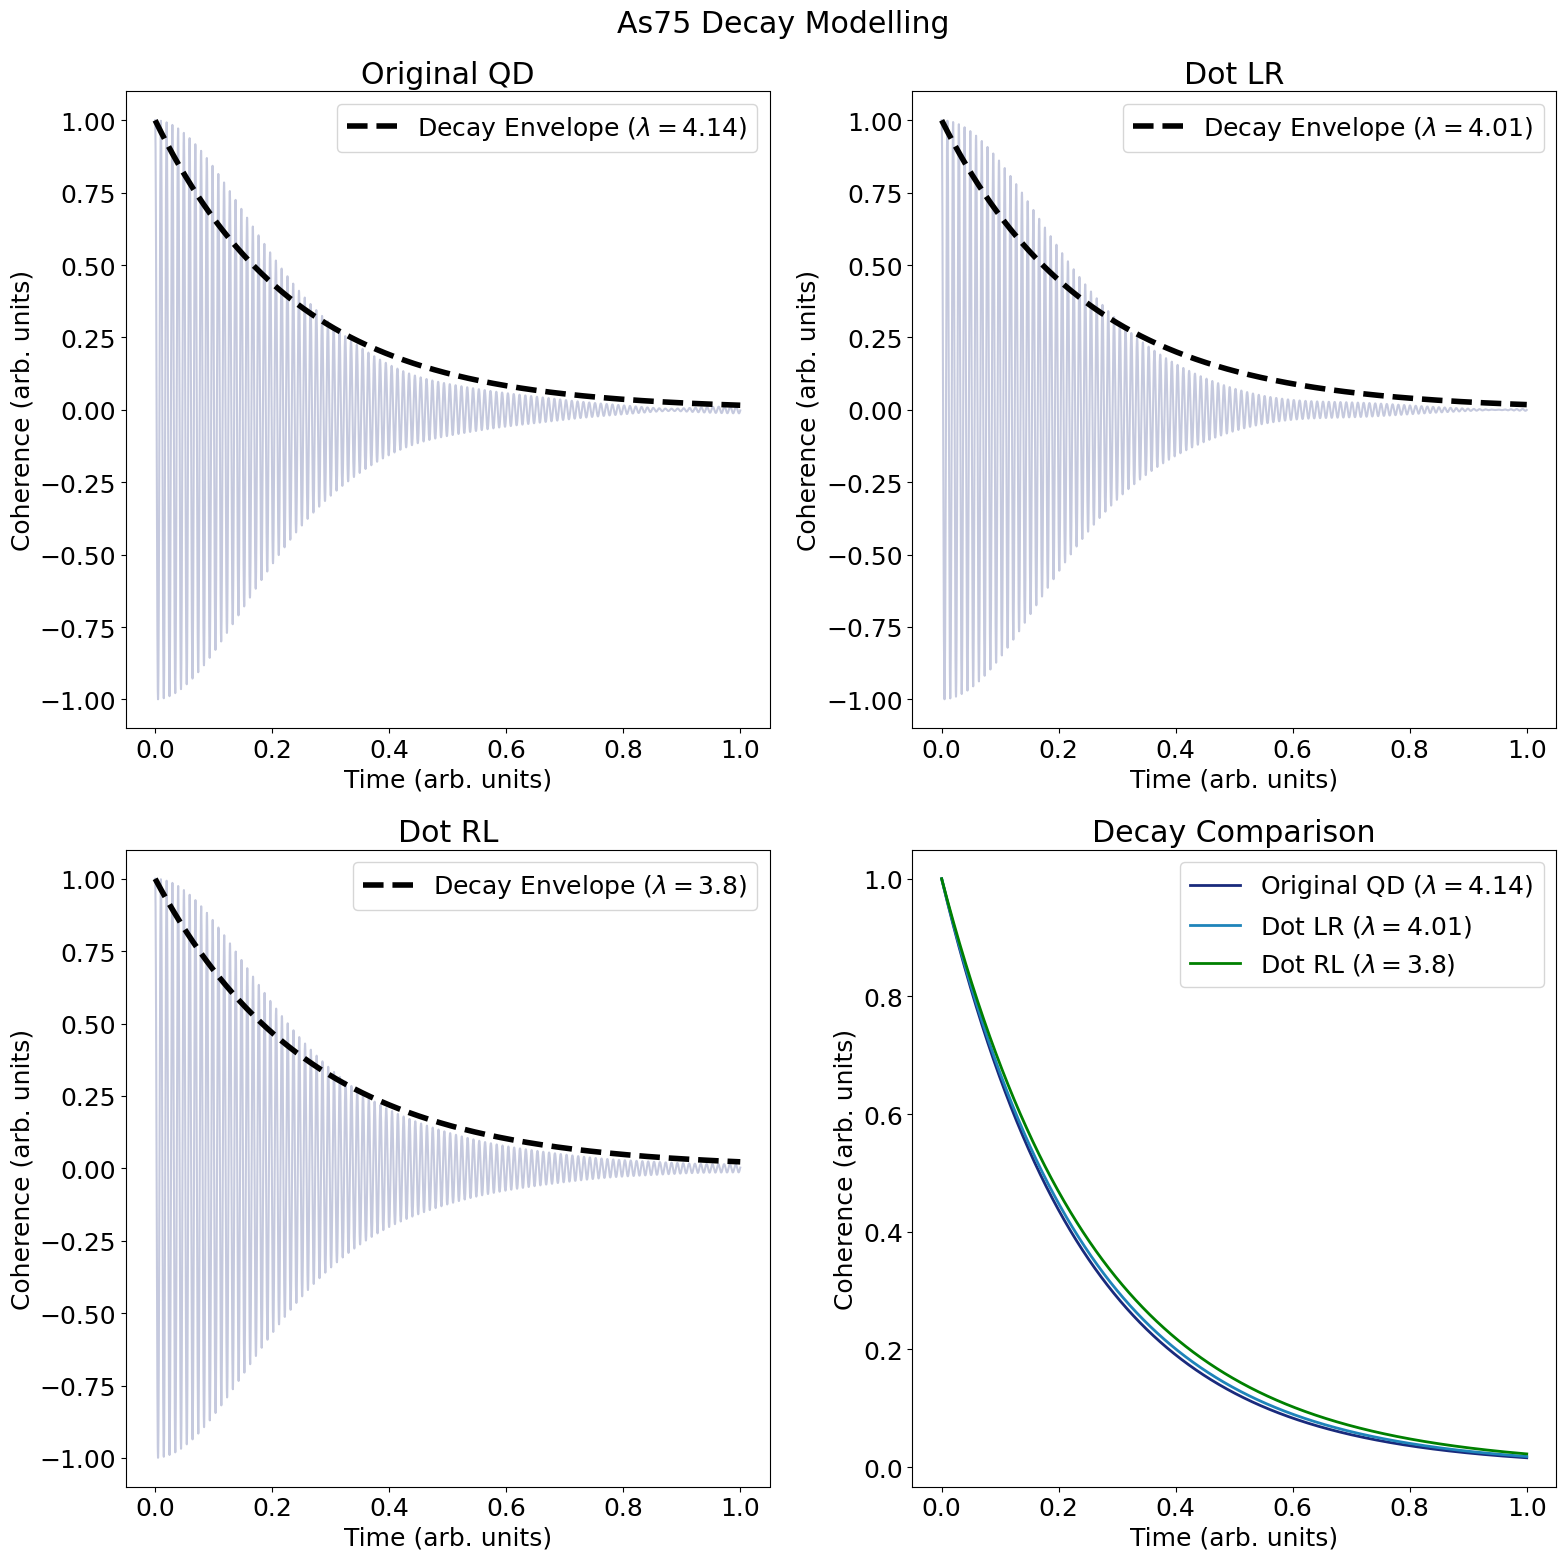

In [21]:
species_all_fits_plotter(as75_all_data, 1)

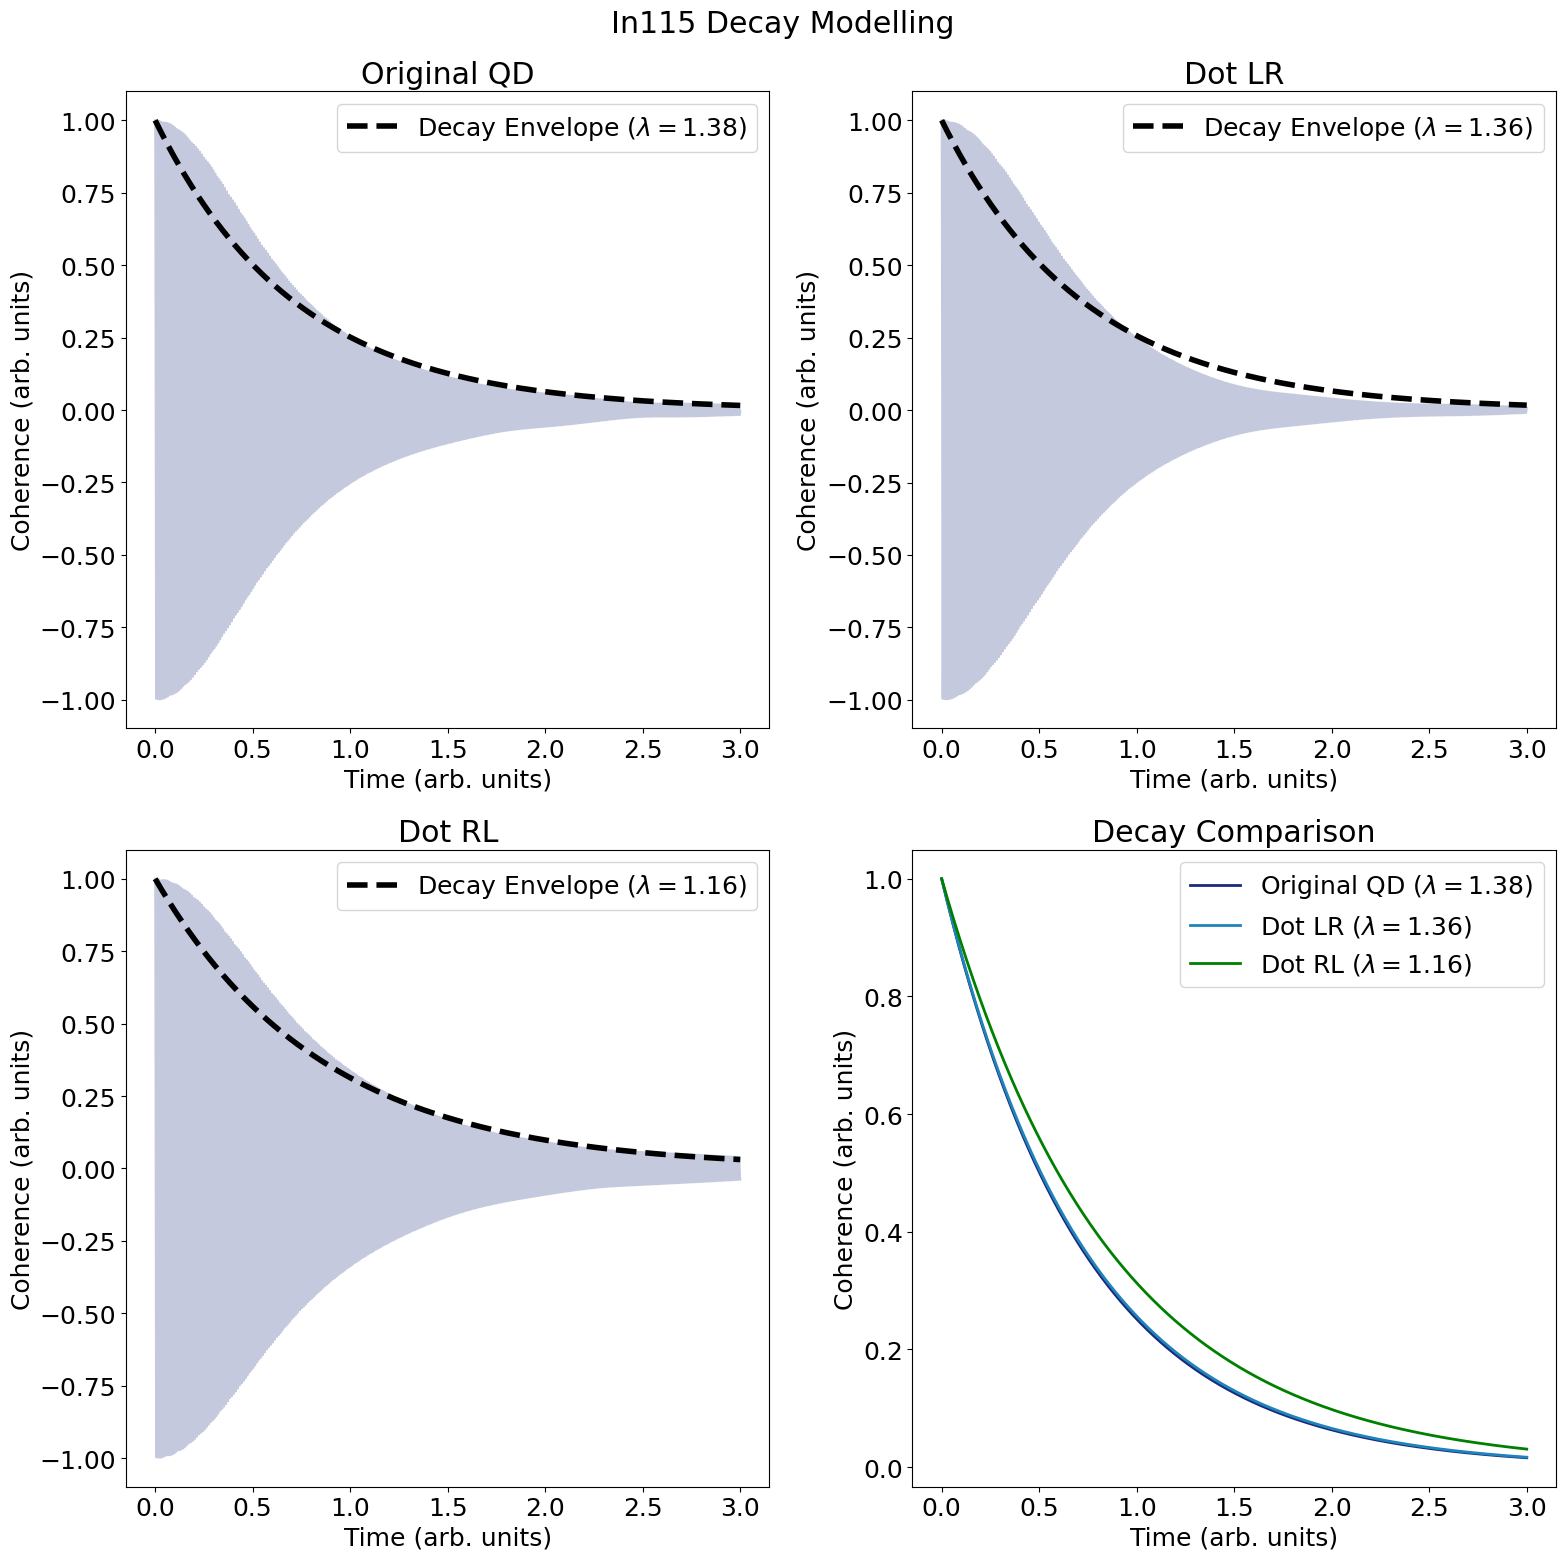

In [22]:
species_all_fits_plotter(in115_all_data, 3)

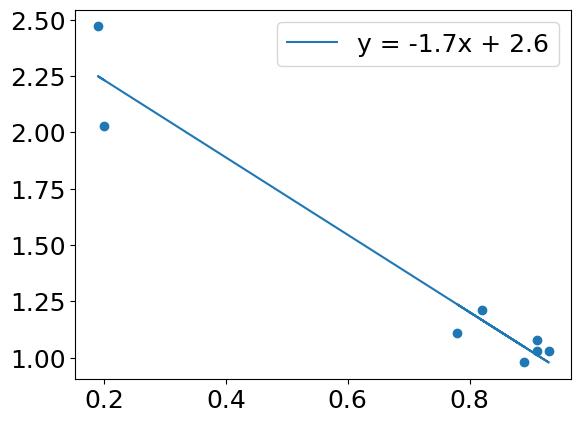

In [23]:
variance_data = np.array([0.20, 0.19, 0.89, 0.78, 0.93, 0.91, 0.91, 0.82])
coherence_time_data = np.array([2.03, 2.47, 0.98, 1.11, 1.03, 1.08, 1.03, 1.21])

m, c = np.polyfit(variance_data, coherence_time_data, deg = 1)
best_fit = [c + m*xi for xi in variance_data]
plt.scatter(variance_data, coherence_time_data)
plt.plot(variance_data, best_fit, label = f"y = {np.around(m,1)}x + {np.around(c, 1)}")
plt.legend()
plt.show()
plt.close()